In [ ]:
import random
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
def find_most_frequent_available_number(dice, available):
    counter = Counter(dice)
    most_common = counter.most_common()
    most_common.sort(key=lambda x: (-x[1], -x[0]))
    
    for num, freq in most_common:
        if num in available:
            return num
    return 0  # Return None if no available number is found

In [3]:
def roll_with_keep(dice, keep):
    new_dice = [d if d == keep else random.randint(1, 6) for d in dice]
    return new_dice

In [4]:
def oneRound(available):
    # Initial roll
    dice = roll_with_keep([1,2,3,4,5], 0)
    keep = find_most_frequent_available_number(dice, available)
    # Second roll
    dice = roll_with_keep(dice, keep)
    keep = find_most_frequent_available_number(dice, available)
    # Last roll
    dice = roll_with_keep(dice, keep)
    keep = find_most_frequent_available_number(dice, available)

    if keep == 0:
        keep= available[0]

    return dice, keep

In [ ]:
#Run time with repeat=400000 : ~ 15 sec
repeat = 400000
round_one_score = 0
game_score = 0
games_score = {}
times_yahtzee = 0
times_yahtzee_and_63 = 0

# Game Simulation
for _ in range(repeat):
    available = [1, 2, 3, 4, 5, 6]
    score = 0
    yahtzee = False
    while(len(available) > 0):
        dice, keep = oneRound(available)
        s = dice.count(keep)*keep
        if(dice.count(keep) == 5) and not yahtzee:
            yahtzee = True
            game_score += 50
            times_yahtzee += 1
        else:
            available.remove(keep)
            score += s
    round_one_score += score
    game_score += score
    
    if (yahtzee) and (score >= 63):
        times_yahtzee_and_63 += 1

    if score not in games_score:
        games_score[score] = 1
    else:
        games_score[score] += 1


AVG score after 400000 games : 56.3822925
Times player got yahtzee : 69569
Times player got yahtzee and over 63 : 17858

Percentage of games :: Score over 63 : 22.0%
percentage of games :: yahtzee : 17.4%
percentage of games :: yahtzee and score over 63 : 4.5%


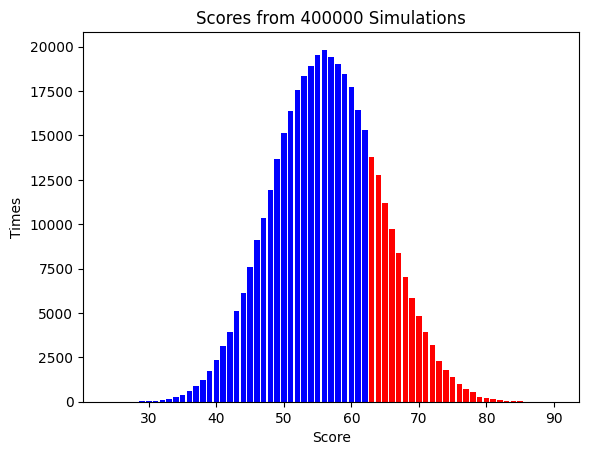

In [6]:
# Benchmark from our programmed inference and decision

print(f"AVG score after {repeat} games : {round_one_score/repeat}")
print(f"Times player got yahtzee : {times_yahtzee}")
print(f"Times player got yahtzee and over 63 : {times_yahtzee_and_63}")
print("")

Ysum = 0
for key, value in games_score.items():
    if key >= 63:
        Ysum += value

print(f"Percentage of games :: Score over 63 : {round((Ysum/repeat),2)*100}%")
print(f"percentage of games :: yahtzee : {round((times_yahtzee/repeat),3)*100}%")
print(f"percentage of games :: yahtzee and score over 63 : {round((times_yahtzee_and_63/repeat),3)*100}%")
# Plotting the scores from games_score
colors = ['red' if score >= 63 else 'blue' for score in games_score.keys()]
plt.bar(games_score.keys(), games_score.values(), color=colors)
plt.xlabel('Score')
plt.ylabel('Times')
plt.title(f'Scores from {repeat} Simulations')
plt.show()